In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("amazonsales2025.csv")

In [3]:
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [4]:
df.tail()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
245,ORD0246,17-03-25,T-Shirt,Clothing,20,2,40,Daniel Harris,Miami,Debit Card,Cancelled
246,ORD0247,30-03-25,Jeans,Clothing,40,1,40,Sophia Miller,Dallas,Debit Card,Cancelled
247,ORD0248,05-03-25,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled
248,ORD0249,08-03-25,Smartwatch,Electronics,150,3,450,Emily Johnson,New York,Debit Card,Cancelled
249,ORD0250,19-02-25,Smartphone,Electronics,500,4,2000,Emily Johnson,Seattle,Amazon Pay,Completed


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [7]:
df.describe()

,Price,Quantity,Total Sales
count,250.000000,250.000000,250.000000
mean,343.580000,2.856000,975.380000
std,380.635808,1.429489,1252.112254
min,15.000000,1.000000,15.000000
25%,40.000000,2.000000,100.000000
50%,150.000000,3.000000,400.000000
75%,600.000000,4.000000,1500.000000
max,1200.000000,5.000000,6000.000000


In [8]:
df.isnull().sum()

Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop("Order ID",axis=1,inplace=True)
df.sample()

,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
183,17-02-25,Book,Books,15,5,75,Daniel Harris,Miami,Debit Card,Pending


In [11]:
df["Date"]=pd.to_datetime(df["Date"])
df["month"]=df["Date"].dt.month_name()
df["day"]=df["Date"].dt.day_name()
df

,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status,month,day
0,2025-03-14,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled,March,Friday
1,2025-03-20,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending,March,Thursday
2,2025-02-15,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled,February,Saturday
3,2025-02-19,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending,February,Wednesday
4,2025-10-03,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending,October,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
245,2025-03-17,T-Shirt,Clothing,20,2,40,Daniel Harris,Miami,Debit Card,Cancelled,March,Monday
246,2025-03-30,Jeans,Clothing,40,1,40,Sophia Miller,Dallas,Debit Card,Cancelled,March,Sunday
247,2025-05-03,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled,May,Saturday
248,2025-08-03,Smartwatch,Electronics,150,3,450,Emily Johnson,New York,Debit Card,Cancelled,August,Sunday


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

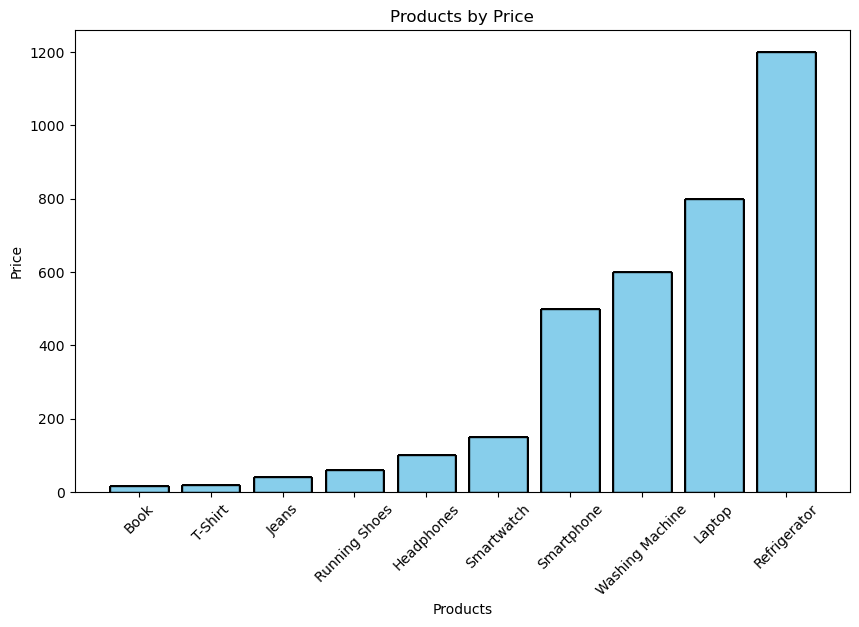

In [16]:
plt.figure(figsize=(10,6))
price_sorted = df['Price'].argsort()
plt.bar(df['Product'][price_sorted],df['Price'][price_sorted], edgecolor = 'black', color = 'skyblue')
plt.title("Products by Price")
plt.xlabel("Products")
plt.ylabel("Price")
plt.xticks(rotation = 45)


In [17]:
product_order=df["Product"].value_counts()

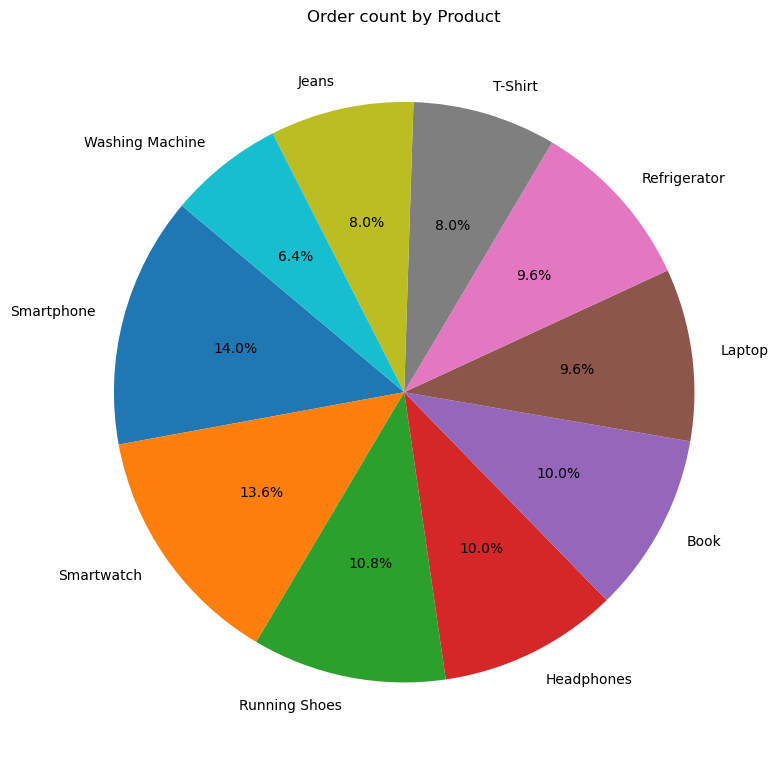

In [19]:
plt.figure(figsize=(8,8))
plt.pie(product_order , labels=product_order.index , autopct="%1.1f%%" , startangle=140)
plt.title("Order count by Product")
plt.tight_layout()
plt.show()

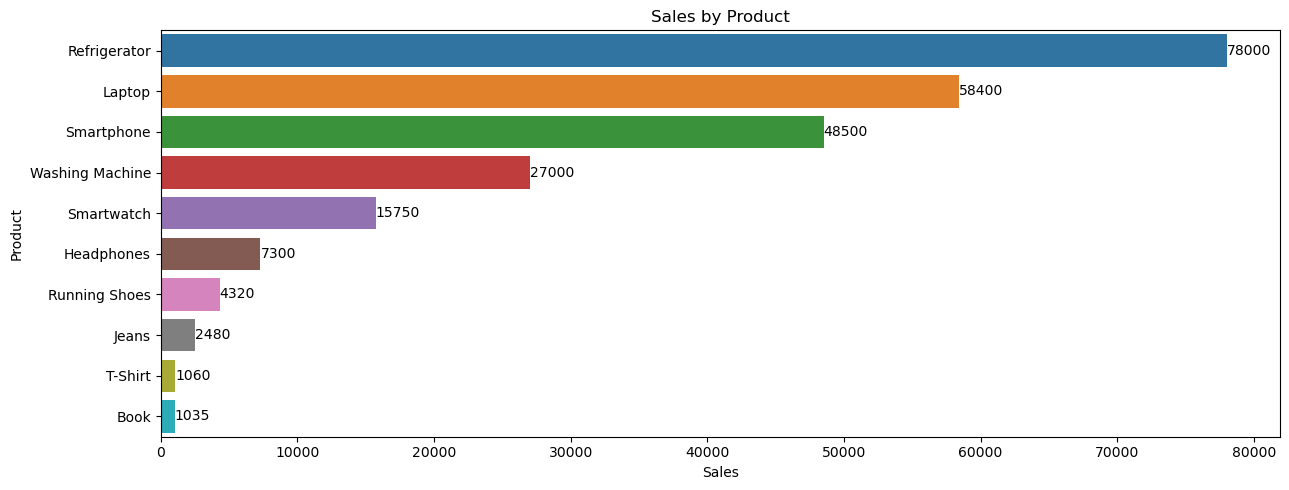

In [24]:
products_sales=df.groupby("Product")["Total Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(13,5))
ax =sbn.barplot(x=products_sales.values , y=products_sales.index , data=df )
plt.title("Sales by Product")
plt.xlabel("Sales")
plt.ylabel("Product")
for container in ax.containers:
    ax.bar_label(container)
    
plt.tight_layout()
plt.show()

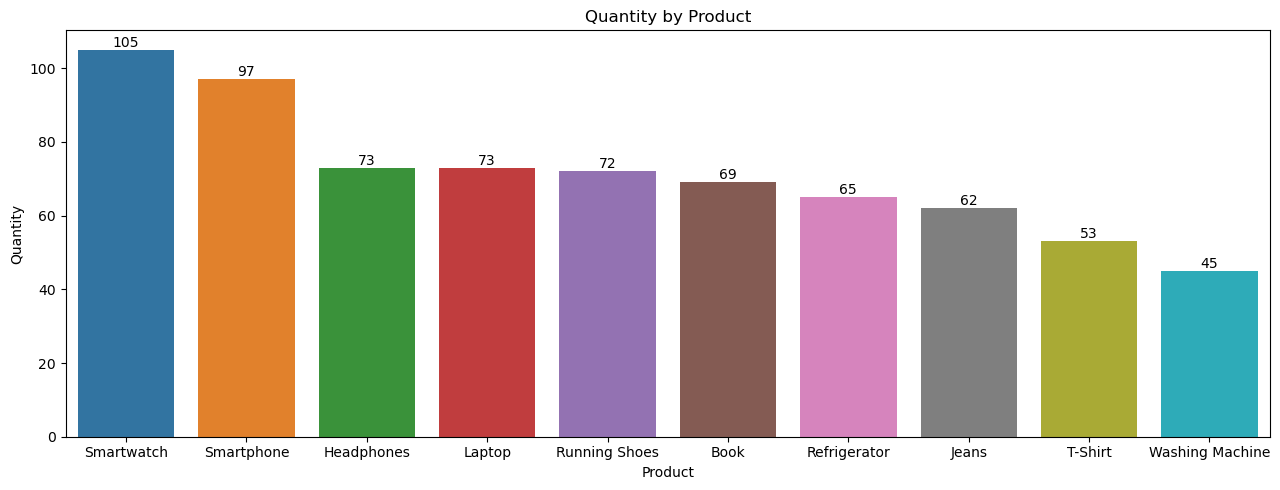

In [25]:
products_quantity=df.groupby("Product")["Quantity"].sum().sort_values(ascending=False)
plt.figure(figsize=(13,5))
ax =sbn.barplot(y=products_quantity.values , x=products_quantity.index , data=df )
plt.title("Quantity by Product")
plt.ylabel("Quantity")
plt.xlabel("Product")
for container in ax.containers:
    ax.bar_label(container)
    
plt.tight_layout()
plt.show()

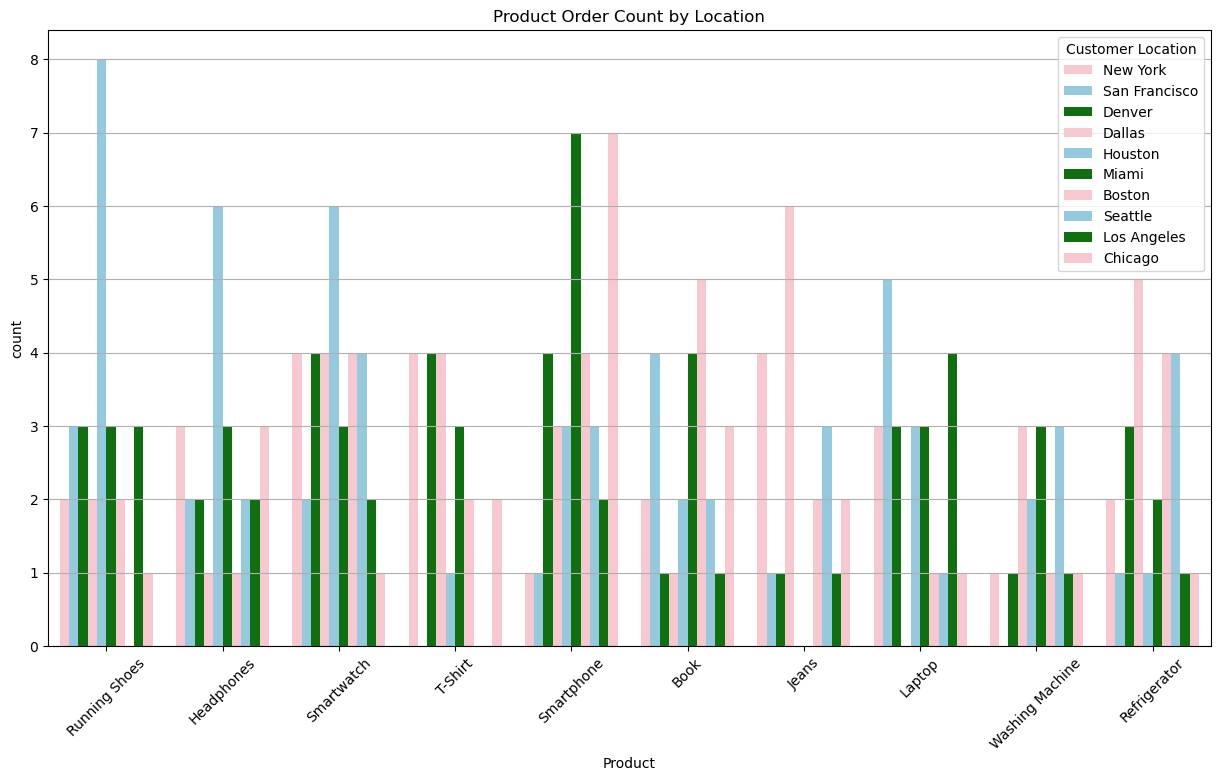

In [29]:
plt.figure(figsize=(15,8))
sbn.countplot(data=df , x="Product" , hue="Customer Location",palette=['pink','skyblue','green'])
plt.title("Product Order Count by Location")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

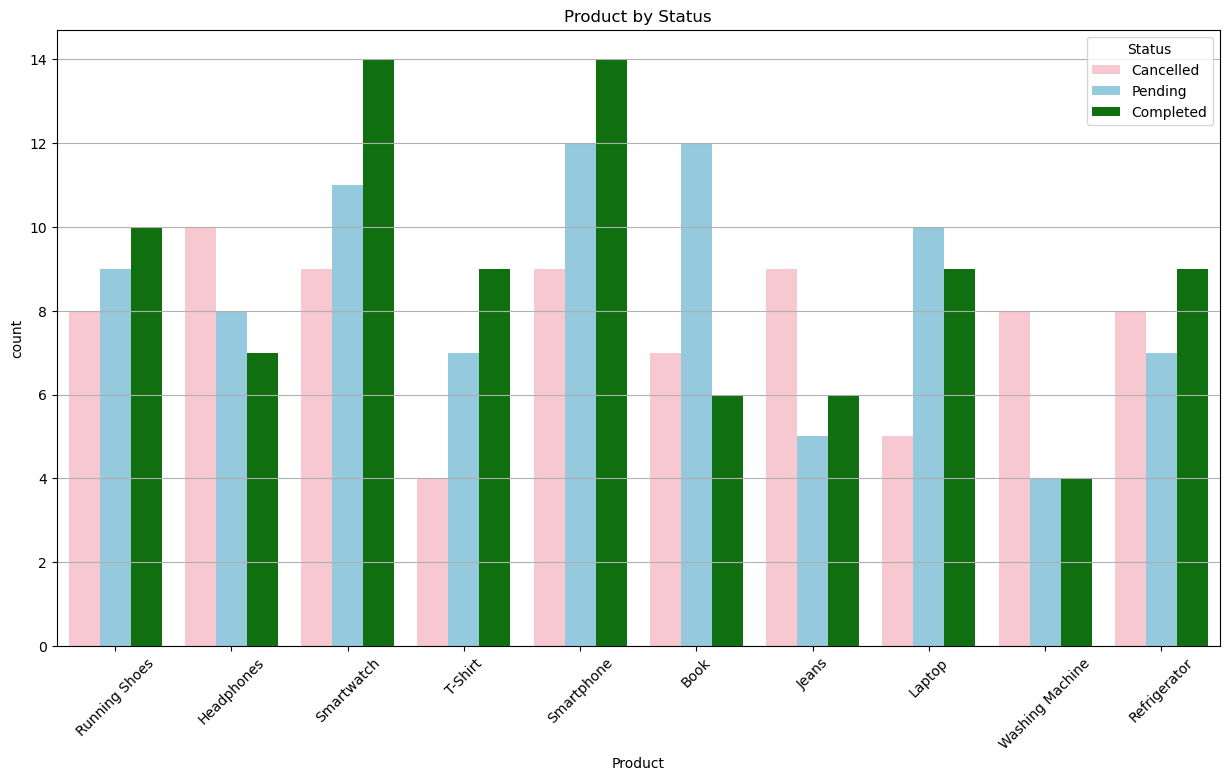

In [36]:
plt.figure(figsize=(15,8))
sbn.countplot(data=df , x="Product" , hue="Status",palette=['pink','skyblue','green'])
plt.title("Product by Status")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

In [30]:
df.sample()

,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status,month,day
79,2025-02-23,Running Shoes,Footwear,60,4,240,Sophia Miller,San Francisco,Debit Card,Pending,February,Sunday


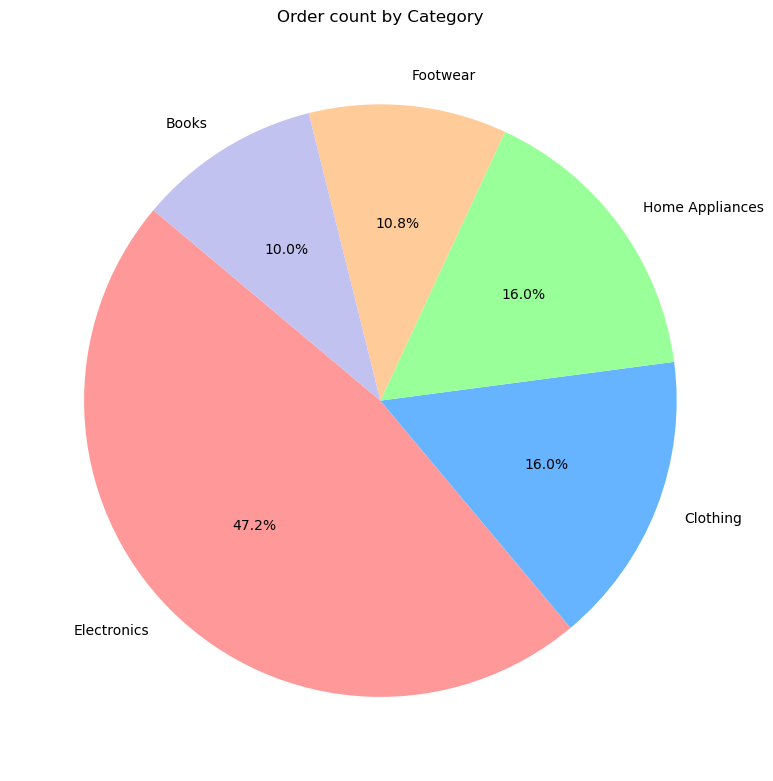

In [20]:
category=df["Category"].value_counts()
plt.figure(figsize=(8,8))
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0', 
          '#FFB6C1', '#B0E0E6', '#FFD700', '#E6E6FA', '#98FB98']
plt.pie(category , labels=category.index , autopct="%1.1f%%" , startangle=140 , colors=colors)
plt.title("Order count by Category")
plt.tight_layout()
plt.show()

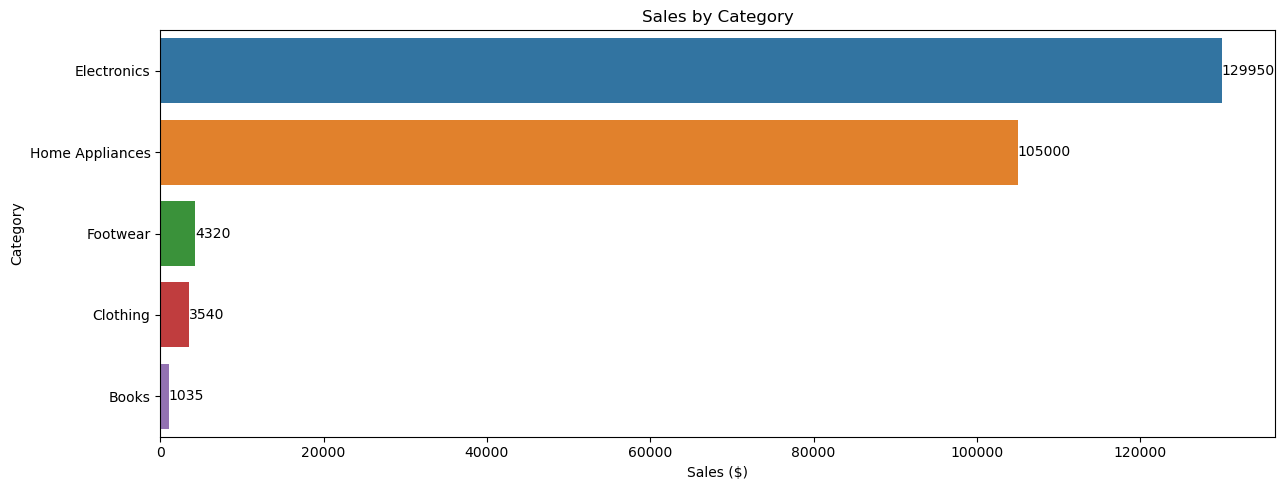

In [32]:
category_sales=df.groupby("Category")["Total Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(13,5))
ax =sbn.barplot(x=category_sales.values , y=category_sales.index , data=df )
plt.title("Sales by Category")
plt.xlabel("Sales ($)")
plt.ylabel("Category")
for container in ax.containers:
    ax.bar_label(container)
    
plt.tight_layout()
plt.show()

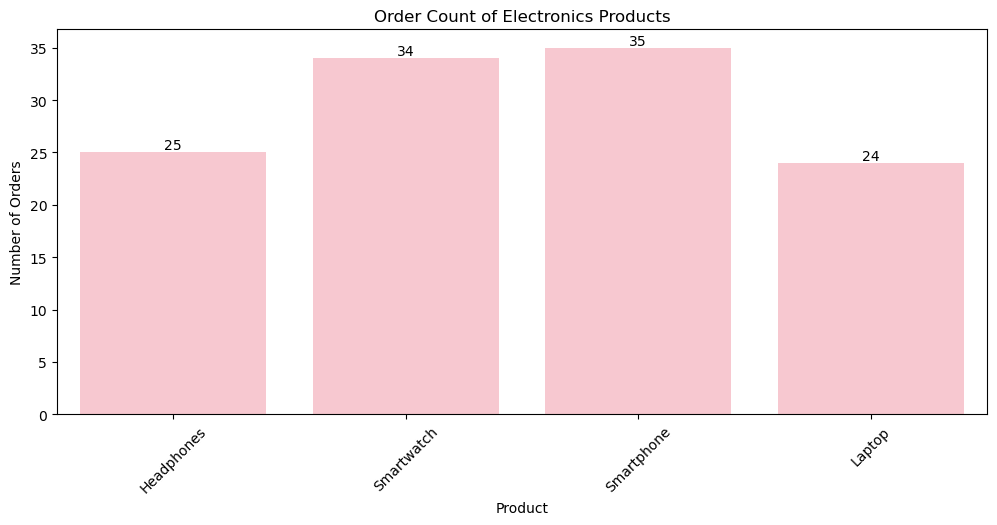

In [93]:
electronics_count = df[df['Category'] == 'Electronics']

plt.figure(figsize=(12, 5))
ax = sbn.countplot(x='Product', data=electronics_count, color="pink")
plt.title('Order Count of Electronics Products')
plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

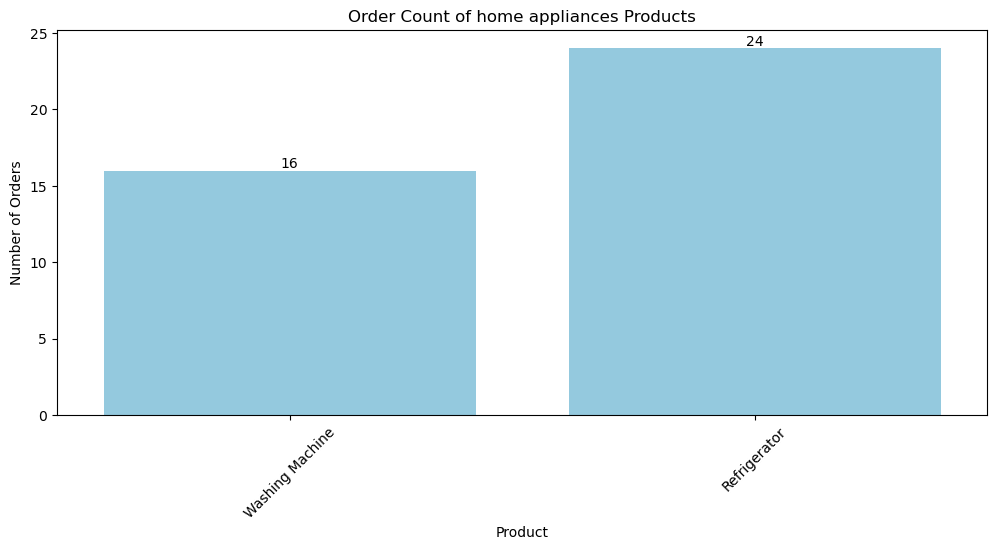

In [95]:
home_count = df[df['Category'] == 'Home Appliances']

plt.figure(figsize=(12, 5))
ax=sbn.countplot(x='Product', data=home_count, color="skyblue")
plt.title('Order Count of home appliances Products')
plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.show()


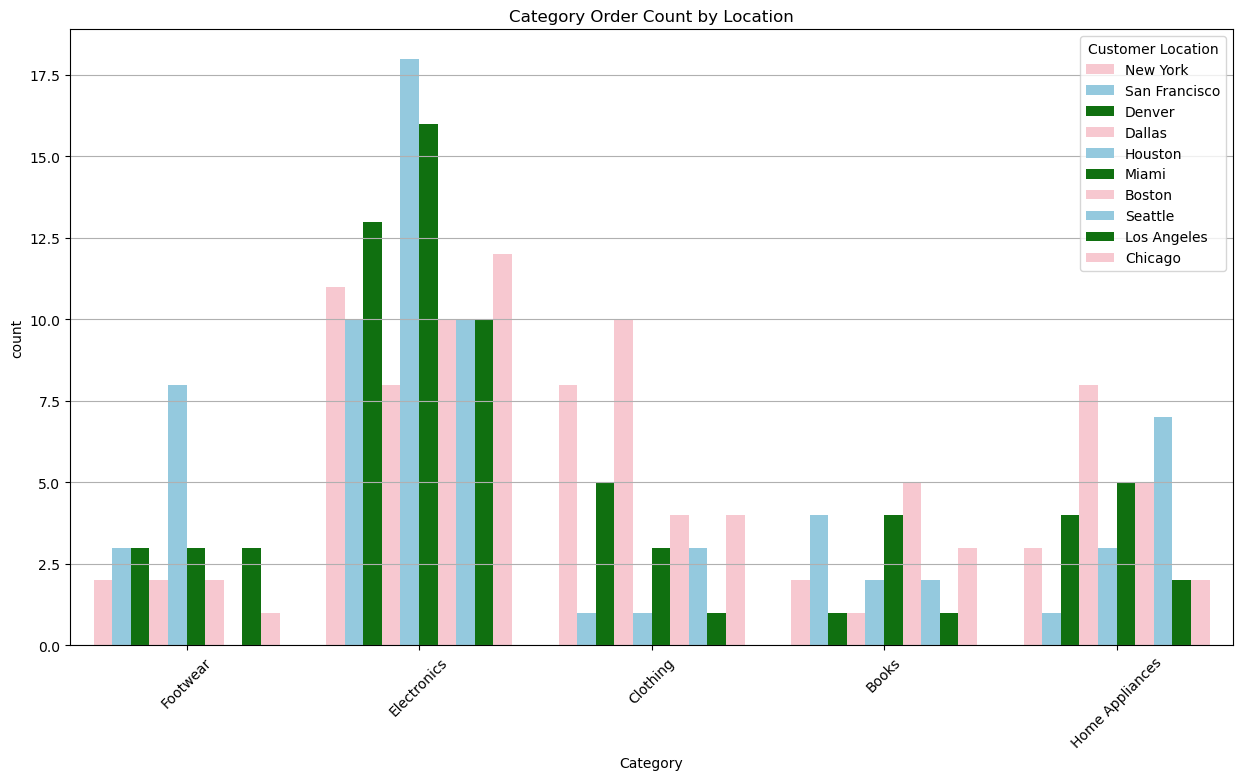

In [33]:
plt.figure(figsize=(15,8))
sbn.countplot(data=df , x="Category" , hue="Customer Location",palette=['pink','skyblue','green'])
plt.title("Category Order Count by Location")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

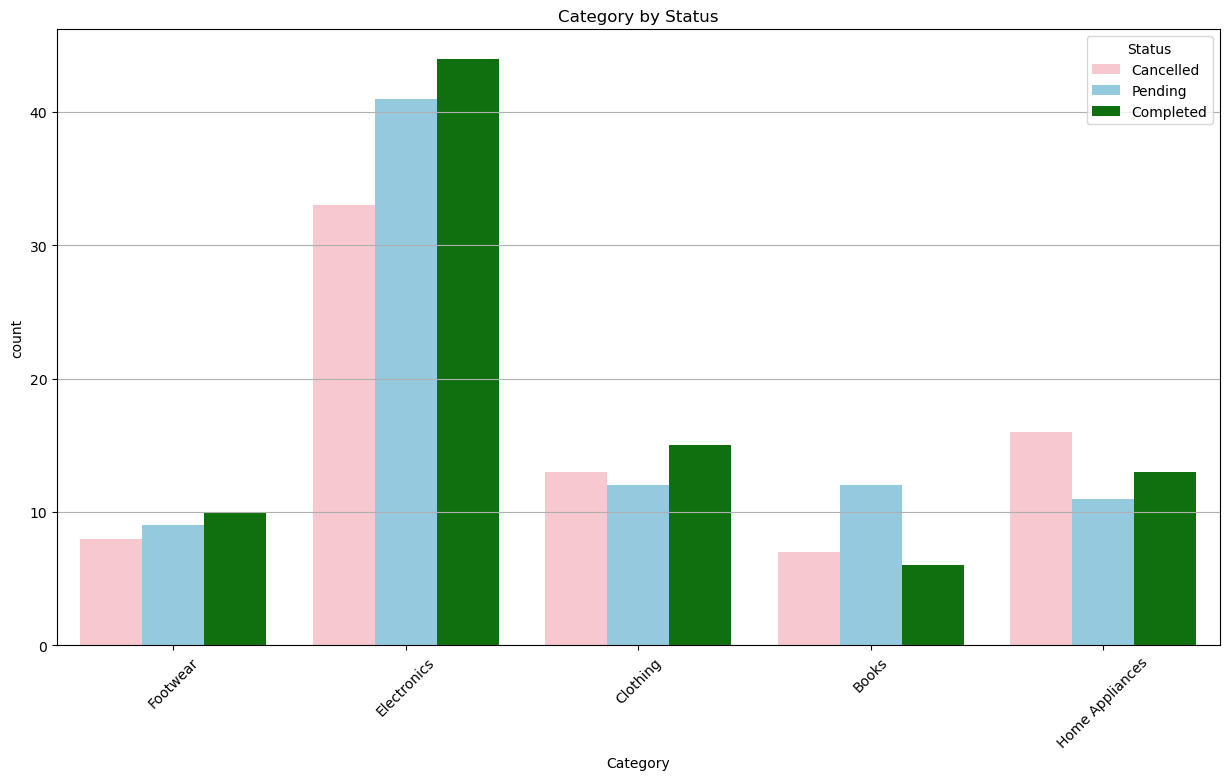

In [35]:
plt.figure(figsize=(15,8))
sbn.countplot(data=df , x="Category" , hue="Status",palette=['pink','skyblue','green'])
plt.title("Category by Status")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

In [37]:
df.sample()

,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status,month,day
74,2025-02-26,Headphones,Electronics,100,2,200,Daniel Harris,Boston,PayPal,Pending,February,Wednesday


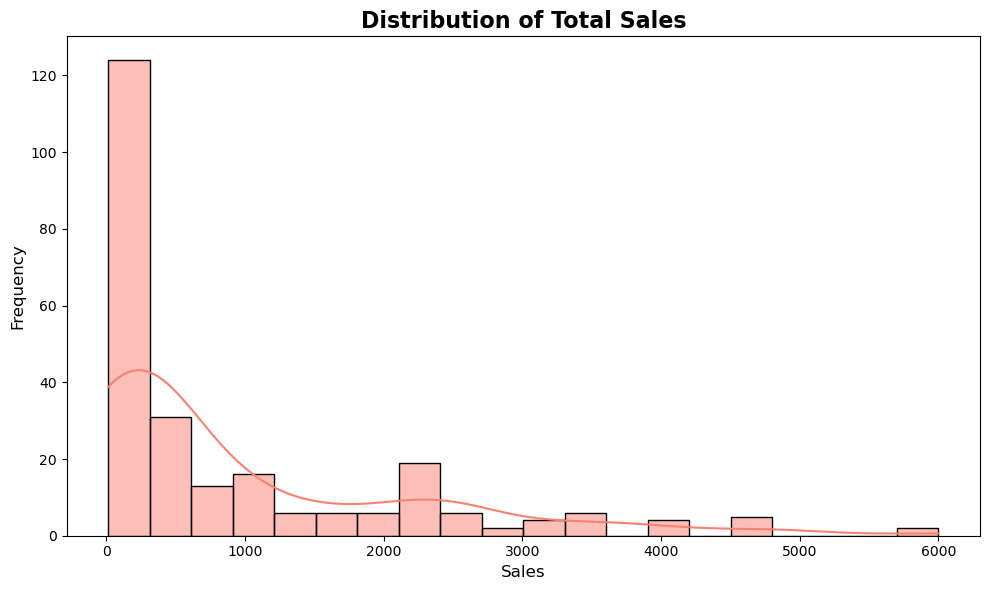

In [39]:
plt.figure(figsize=(10, 6))
sbn.histplot(df['Total Sales'], kde=True, color='salmon', bins=20)
plt.title('Distribution of Total Sales', fontsize=16, weight='bold')
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

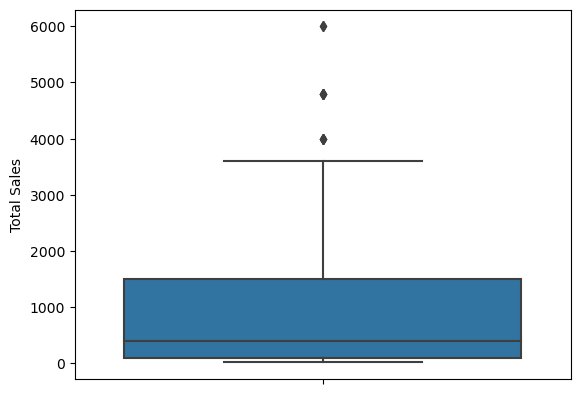

In [74]:
sbn.boxplot(y = df["Total Sales"])
plt.show()

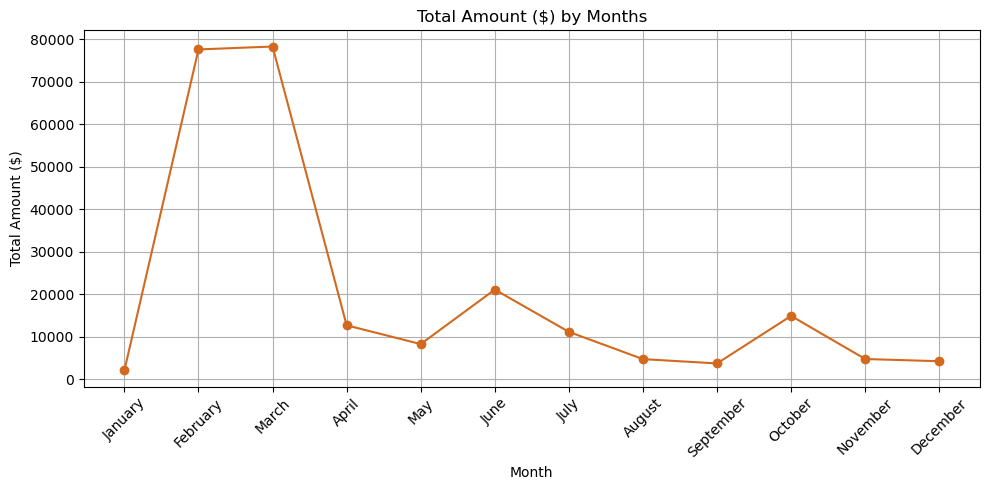

In [40]:
plt.figure(figsize=(10,5))
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales = df.groupby('month')['Total Sales'].sum().reindex(month_order, fill_value=0)
ax = monthly_sales.plot(kind='line', marker='o', color='#D2691E')
ax.set_title("Total Amount ($) by Months")
ax.set_xlabel("Month")
ax.set_ylabel("Total Amount ($)")
ax.set_xticks(range(len(month_order)))
ax.set_xticklabels(month_order, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
df.groupby(["Product","month"])["Total Sales"].sum().sort_values(ascending=False)

Product       month   
Laptop        March       24800
Refrigerator  March       22800
Laptop        February    21600
Refrigerator  February    19200
Smartphone    February    15500
                          ...  
Jeans         November       40
T-Shirt       October        20
              July           20
              January        20
Book          April          15
Name: Total Sales, Length: 72, dtype: int64

In [50]:
df.columns

Index(['Date', 'Product', 'Category', 'Price', 'Quantity', 'Total Sales',
       'Customer Name', 'Customer Location', 'Payment Method', 'Status',
       'month', 'day'],
      dtype='object')

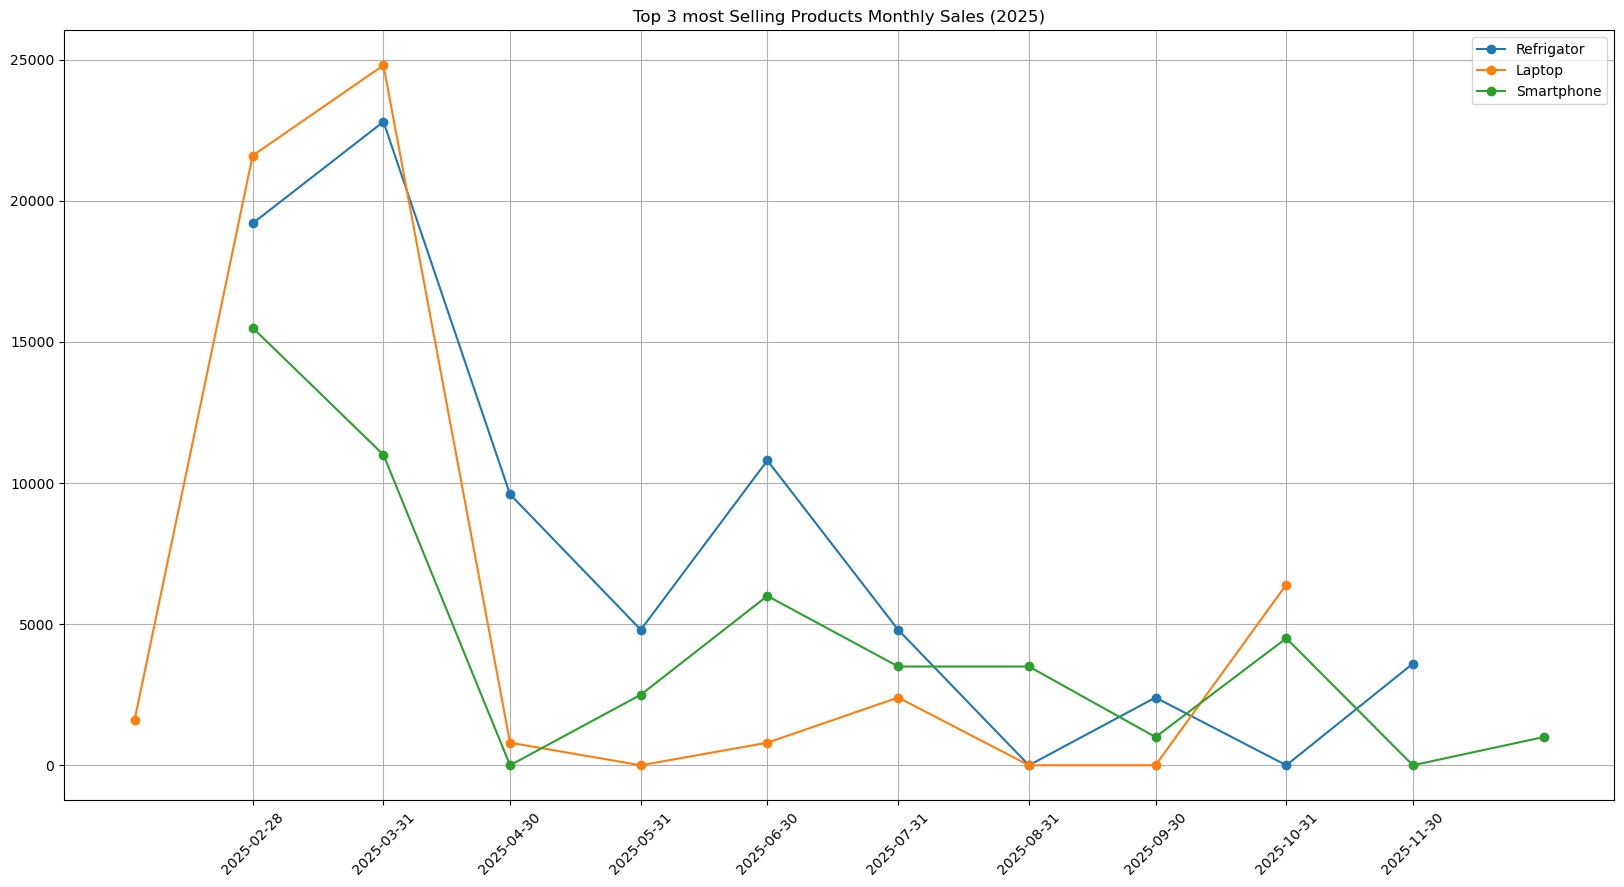

In [59]:
Refrigerator = df[df['Product'] == 'Refrigerator']
Refrigerator = Refrigerator.set_index('Date')  
Refrigerator = Refrigerator['Total Sales'].resample('M').sum()
Refrigerator = Refrigerator.reset_index()

Laptop=df[df["Product"]=="Laptop"]
Laptop=Laptop.set_index("Date")
Laptop=Laptop["Total Sales"].resample("M").sum()
Laptop=Laptop.reset_index()

Smartphone=df[df["Product"]=="Smartphone"]
Smartphone=Smartphone.set_index("Date")
Smartphone=Smartphone["Total Sales"].resample("M").sum()
Smartphone=Smartphone.reset_index()

plt.figure(figsize=(20,10))
plt.plot(Refrigerator["Date"], Refrigerator["Total Sales"], marker ="o" , label="Refrigator")
plt.plot(Laptop["Date"], Laptop["Total Sales"], marker ="o" , label="Laptop")
plt.plot(Smartphone["Date"], Smartphone["Total Sales"], marker ="o" , label="Smartphone")
plt.title('Top 3 most Selling Products Monthly Sales (2025)')
plt.xticks(Refrigerator['Date'], rotation=45)
plt.grid(True)
plt.legend()
plt.show()

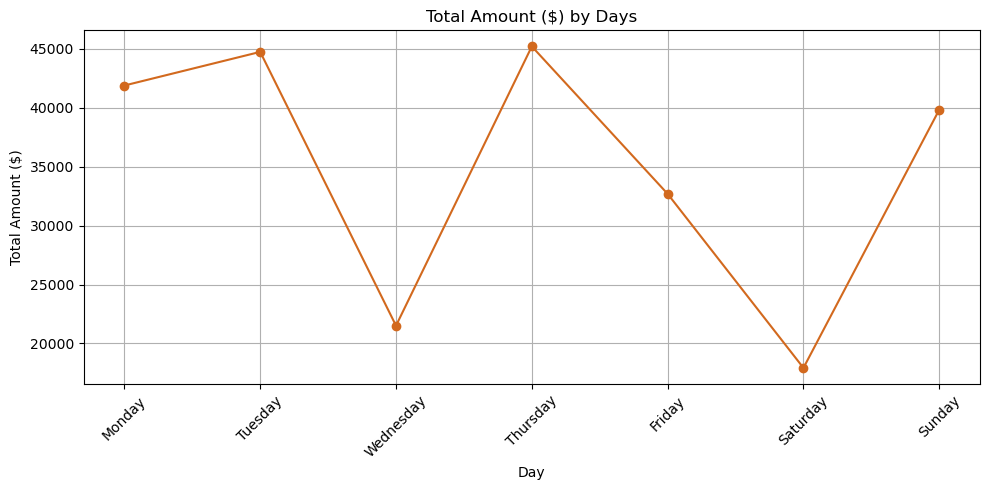

In [45]:
plt.figure(figsize=(10,5))
daily_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = df.groupby('day')['Total Sales'].sum().reindex(daily_order, fill_value=0)
ax = daily_sales.plot(kind='line', marker='o', color='#D2691E')
ax.set_title("Total Amount ($) by Days")
ax.set_xlabel("Day")
ax.set_ylabel("Total Amount ($)")
ax.set_xticks(range(len(daily_order)))
ax.set_xticklabels(daily_order, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

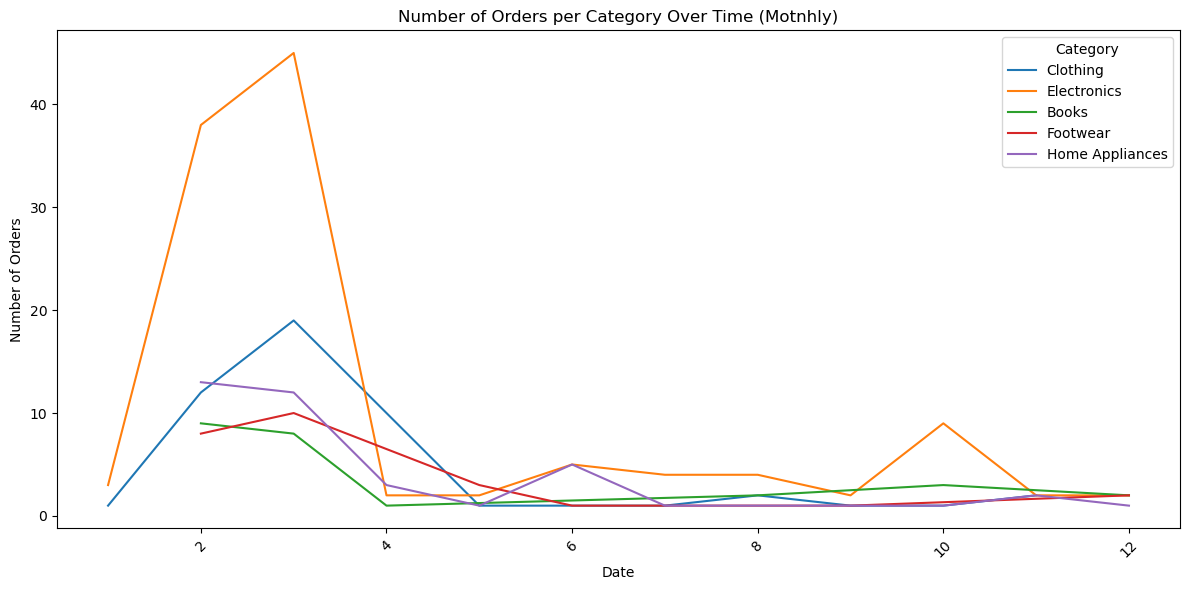

In [76]:
orders_per_category_yearly = df.groupby([df['Date'].dt.month, 'Category']).size().reset_index(name='Count')


plt.figure(figsize=(12, 6))
sbn.lineplot(x='Date', y='Count', hue='Category', data=orders_per_category_yearly)
plt.title('Number of Orders per Category Over Time (Motnhly)')
plt.xticks(rotation=45)
plt.ylabel('Number of Orders')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

month            January  February  March  April  May  June  July  August  \
Product                                                                     
Book                   0         9      8      1    0     0     0       2   
Headphones             1         9      9      1    1     1     1       0   
Jeans                  0         6     13      0    0     0     0       0   
Laptop                 1         9      9      1    0     1     1       0   
Refrigerator           0         6      8      2    1     3     1       0   
Running Shoes          0         8     10      0    3     1     1       1   
Smartphone             0        11     10      0    1     3     2       2   
Smartwatch             1         9     17      0    0     0     0       2   
T-Shirt                1         6      6      0    1     0     1       2   
Washing Machine        0         7      4      1    0     2     0       0   

month            September  October  November  December  
Product          

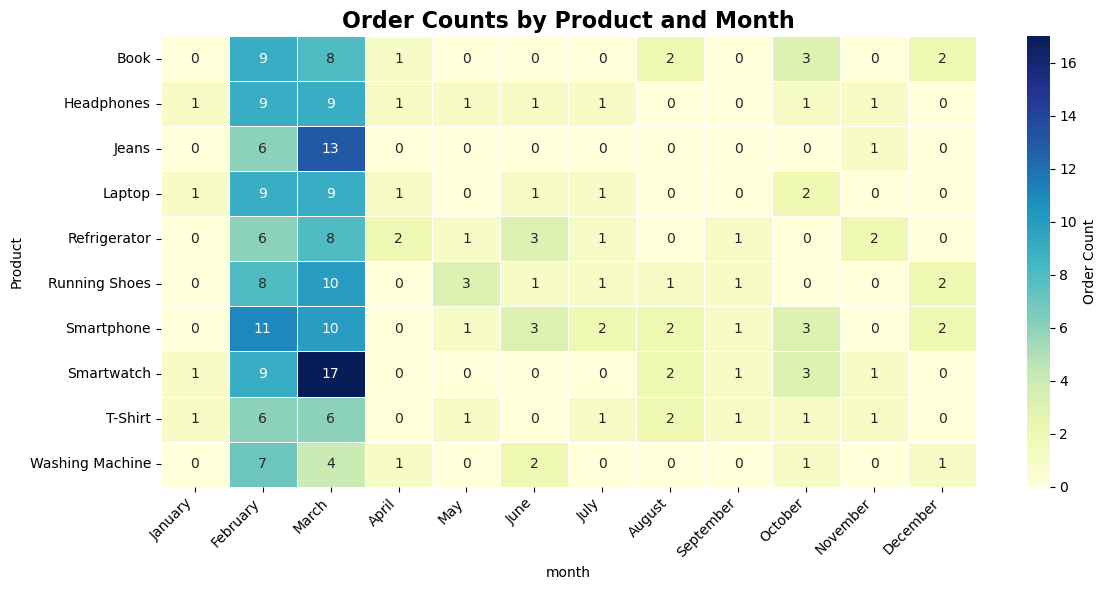

In [86]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
pivot_data = pd.pivot_table(
    df, 
    columns='month', 
    index='Product', 
    values='Quantity',
    aggfunc='count'
)

print(pivot_data)


plt.figure(figsize=(12, 6))
ax = sbn.heatmap(
    pivot_data, 
    annot=True,       
    cmap='YlGnBu',     
   fmt='.0f',           
    linewidths=0.5,    
    cbar_kws={'label': 'Order Count'},  
)


plt.title('Order Counts by Product and Month', fontsize=16, weight='bold')


plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

In [60]:
df.sample()

,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status,month,day
164,2025-03-14,Book,Books,15,1,15,David Lee,New York,Amazon Pay,Pending,March,Friday


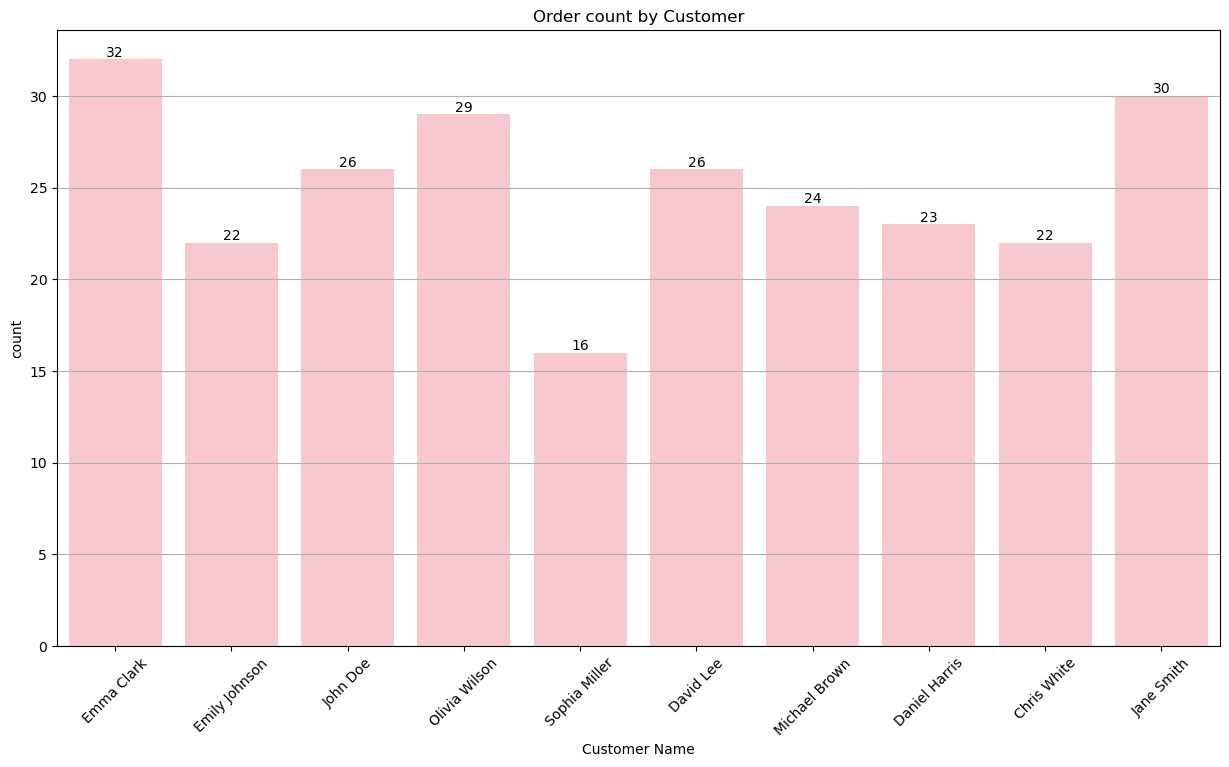

In [64]:
plt.figure(figsize=(15,8))
ax =sbn.countplot(data=df , x="Customer Name" ,color="pink")
plt.title("Order count by Customer")
plt.xticks(rotation=45)
plt.grid(axis="y")
for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

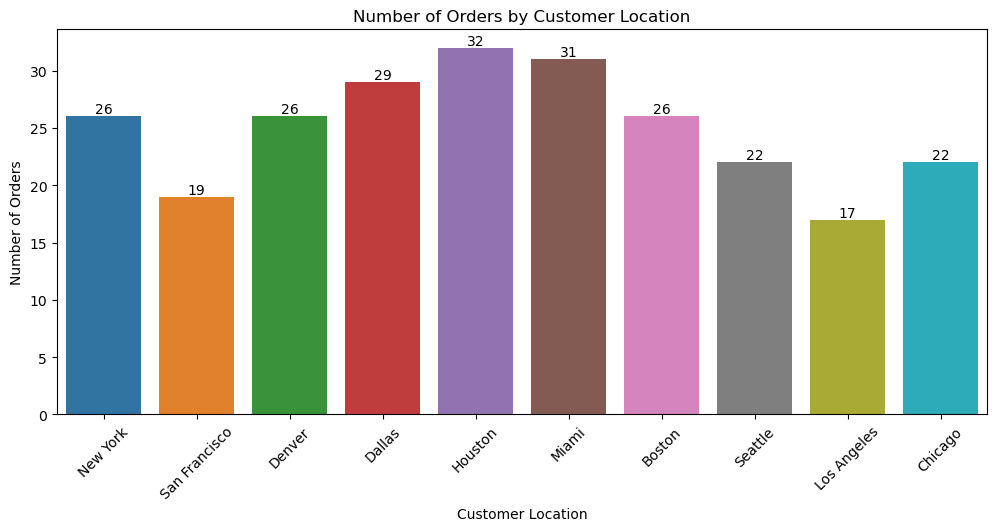

In [97]:
plt.figure(figsize=(12, 5))
ax =sbn.countplot(x='Customer Location', data=df) 
plt.title('Number of Orders by Customer Location')
plt.xlabel('Customer Location')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

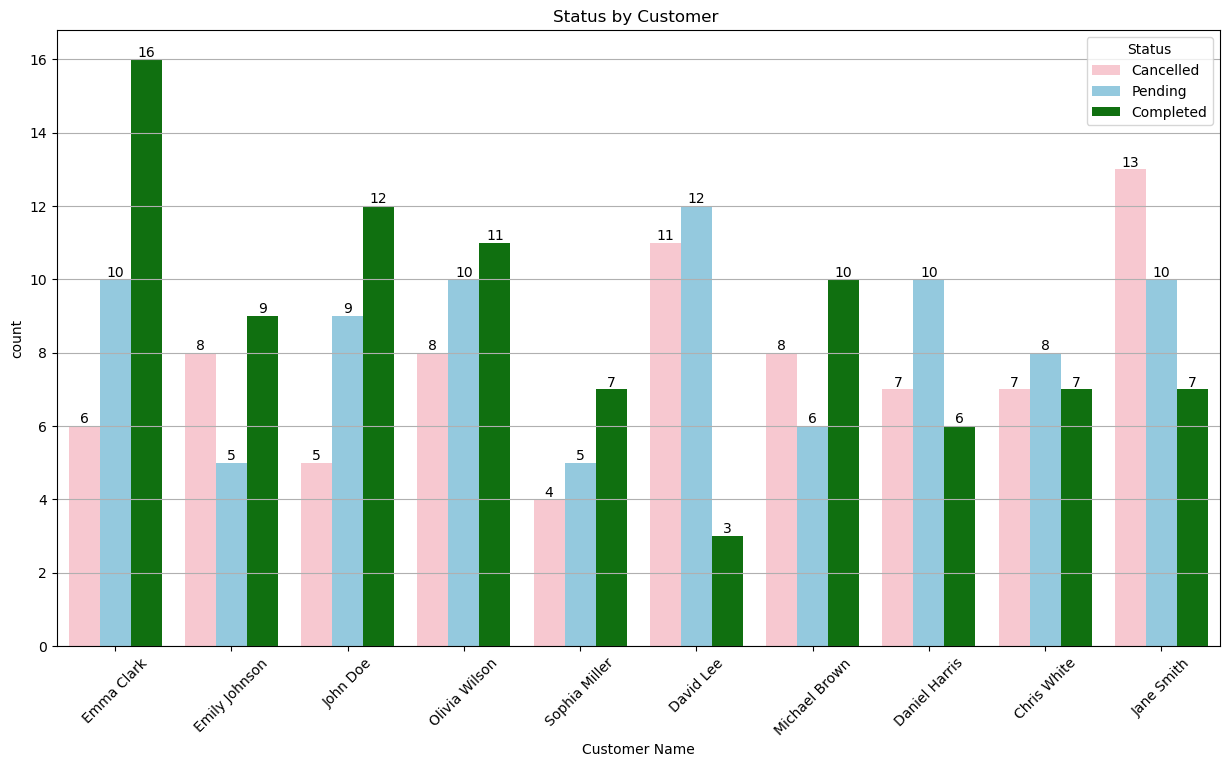

In [65]:
plt.figure(figsize=(15,8))
ax =sbn.countplot(data=df , x="Customer Name" , hue="Status",palette=['pink','skyblue','green'])
plt.title("Status by Customer ")
plt.xticks(rotation=45)
plt.grid(axis="y")
for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

In [68]:
df["Payment Method"].unique()

array(['Debit Card', 'Amazon Pay', 'Credit Card', 'PayPal', 'Gift Card'],
      dtype=object)

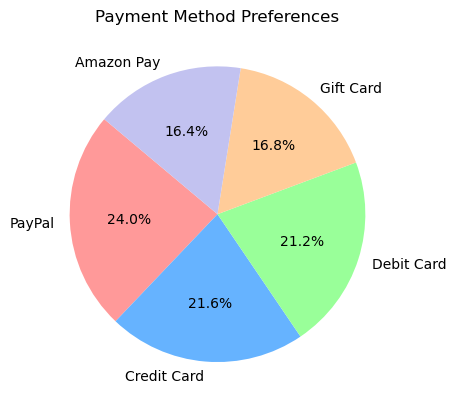

In [69]:
pay_method=df["Payment Method"].value_counts()
plt.pie(pay_method, labels=pay_method.index , autopct="%1.1f%%" , startangle=140, colors=colors)
plt.title("Payment Method Preferences")
plt.show()

In [75]:
df.sample()

,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status,month,day
96,2025-03-25,Book,Books,15,5,75,Olivia Wilson,Chicago,Amazon Pay,Pending,March,Tuesday


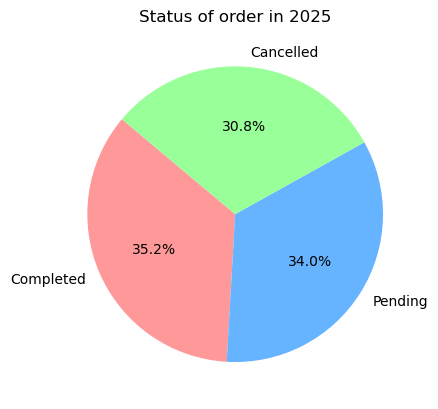

In [89]:
status=df["Status"].value_counts()
plt.pie(status, labels=status.index , autopct="%1.1f%%" , startangle=140, colors=colors)
plt.title("Status of order in 2025")
plt.show()